# Como automatizar o envio de e-mails?
## Um tutorial bem simples mas que pode te devolver horas de trabalho manual

Com esse algoritmo você terá uma máquina de mandar e-mails, dependendo somente de uma conta gmail para realizar os envios, de maneira simples, prática e rápida

<center>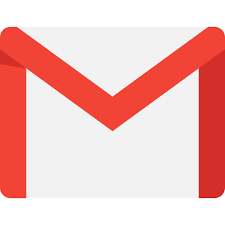<center>

### Antes de prosseguirmos, cabe notar que para executar esse tipo de automação, temos que alterar no próprio gerenciador da sua conta de gmail para a seguinte configuração:

<center><img src="seguranca.png"><center>

### Conectando com o Google Sheets

Para mais detalhes de como conseguir sua chave de acesso a API do Google Sheets [clique aqui](https://developers.google.com/sheets/api/quickstart/python)

In [29]:
# carregando os pacotes necessários para acesso ao Google Sheets de maneira remota
from __future__ import print_function
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
import pandas as pd # necessário para criação de um dataframe posterior a importação


SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']

### Para facilitar a intuição sobre o que estamos trabalhando, tome o seguinte exemplo de tabela de envios de email:

<center><img src="sheets.png"><center>

In [ ]:
SAMPLE_SPREADSHEET_ID = 'id_da_sua_planilha' # identificação da tabela no google sheets
SAMPLE_RANGE_NAME = 'df!A1:G1000' #importando somente as colunas que serão usadas

def main():

    creds = None
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)

    service = build('sheets', 'v4', credentials=creds)

    sheet = service.spreadsheets()
    result = sheet.values().get(spreadsheetId=SAMPLE_SPREADSHEET_ID,
                                range=SAMPLE_RANGE_NAME).execute()
    values = result.get('values', [])
    df = pd.DataFrame(values)
    return(df)
    
df = main()

### Gerando o arquivo de teste dos parâmetros do email

In [31]:
df.columns=df.iloc[0] #pegando a primeira linha como nome de coluna
df = df.iloc[1:] #desconsiderando a primeira linha, para evitar duplicata
df.to_csv('contacts_file.csv',index = False) # esses dados serão seu check, para ver se os dados que você está mandando por email estão ok

### Envio do email

In [ ]:
# bibliotecas proprias para automatização de e-mails
import csv, smtplib, ssl
from email.header import Header
from email.mime.text import MIMEText

# criação de uma instância entre sua conta no gmail e o algoritmo


from_address = "seu_email@gmail.com"
password = input("Digite sua senha aqui: ") #proteção da senha

context = ssl.create_default_context()
with smtplib.SMTP_SSL("smtp.gmail.com", 465, context=context) as server:
    server.login(from_address, password)
    with open("contacts_file.csv", encoding = "utf-8") as file: #dando o encoding que aceita acentos
        reader = csv.reader(file) # abrindo o csv de verificação de dados
        next(reader)  
        for nome,email,username,senha,assunto,cabecalho,corpo in reader:
            message = MIMEText(corpo)  #estipulando a mensagem
            message['Subject'] = Header(assunto) 
            message['From'] = "seu_email@gmail.com"
            message['To'] = email
            server.sendmail(
                from_address,
                email,
                message.as_string()) #envio do email

### Por fim, você terá alguma coisa parecida com isso chegando para os destinatários

<center><img src="email_mandado.png"><center>